<a href="https://colab.research.google.com/github/amitpuri/openagi-codes/blob/main/notebooks/MLPClassifier_for_Binary_Classification_Breast_Cancer_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.96


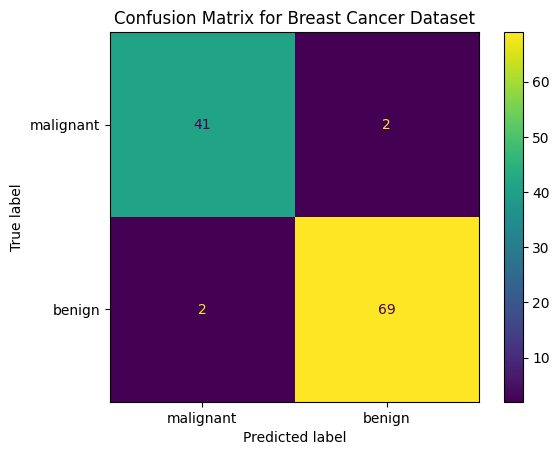

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        43
           1       0.97      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



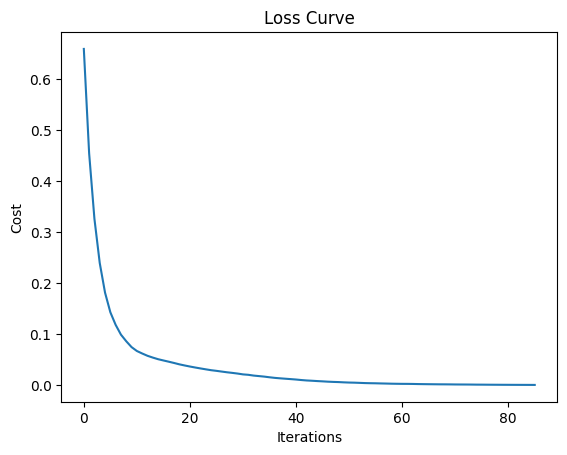

Best parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (120, 80, 40), 'learning_rate': 'constant', 'max_iter': 150, 'solver': 'sgd'}
Tuned Accuracy: 0.98


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# 1. Loading the Libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

# 2. Loading the Data
data = load_breast_cancer()
X, y = data.data, data.target

# 3. Data Pre‑processing
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler().fit(trainX)
trainX_scaled = scaler.transform(trainX)
testX_scaled = scaler.transform(testX)

# 4. MLPClassifier Training
mlp_clf = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter=300,
                        activation='relu',
                        solver='adam',
                        random_state=42)
mlp_clf.fit(trainX_scaled, trainY)

# 5. Model Evaluation
y_pred = mlp_clf.predict(testX_scaled)
print("Accuracy: {:.2f}".format(accuracy_score(testY, y_pred)))
cm = ConfusionMatrixDisplay.from_estimator(mlp_clf, testX_scaled, testY, display_labels=data.target_names)
cm.ax_.set_title("Confusion Matrix for Breast Cancer Dataset")
plt.show()
print(classification_report(testY, y_pred))
plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()

# 6. Hyperparameter Tuning
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100, 150],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive']
}
grid = GridSearchCV(MLPClassifier(random_state=42), param_grid, n_jobs=-1, cv=5)
grid.fit(trainX_scaled, trainY)
print("Best parameters:", grid.best_params_)
grid_predictions = grid.predict(testX_scaled)
print("Tuned Accuracy: {:.2f}".format(accuracy_score(testY, grid_predictions)))